In [0]:
""" Para cargar desde el compu c: 
from os import listdir
from os.path import isfile, join
def ls(ruta = '.'):
    return [arch for arch in listdir(ruta) if isfile(join(ruta, arch))]

os.chdir("/home/valentina/my_git/Mineriadatos")
at = pd.read_csv('atributos.csv')
os.chdir("/home/valentina/my_git/Mineriadatos/UTKFace")

print(os.getcwd())
archivos=ls()
len(archivos)"""

' Para cargar desde el compu c: \ndef ls(ruta = \'.\'):\n    return [arch for arch in listdir(ruta) if isfile(join(ruta, arch))]\n\nos.chdir("/home/valentina/my_git/Mineriadatos")\nat = pd.read_csv(\'atributos.csv\')\nos.chdir("/home/valentina/my_git/Mineriadatos/UTKFace")\n\narchivos=ls()\nlen(archivos)'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import tarfile
# example of converting an image with the Keras API
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

In [0]:
tar = tarfile.open('/content/drive/My Drive/UTKFace.tar.gz')
tar.extractall()

In [5]:
at = pd.read_csv('/content/drive/My Drive/Mineria/atributos.csv')
at

,Id,edad,mujer,raza_0a4
0,UTKFace/1_0_0_20161219140623097.jpg.chip.jpg,1,0,0
1,UTKFace/1_0_0_20161219140627985.jpg.chip.jpg,1,0,0
2,UTKFace/1_0_0_20161219140642920.jpg.chip.jpg,1,0,0
3,UTKFace/1_0_0_20161219154018476.jpg.chip.jpg,1,0,0
4,UTKFace/1_0_0_20161219154556757.jpg.chip.jpg,1,0,0
...,...,...,...,...
23700,UTKFace/99_1_0_20170120134718759.jpg.chip.jpg,99,1,0
23701,UTKFace/99_1_0_20170120221920654.jpg.chip.jpg,99,1,0
23702,UTKFace/99_1_1_20170120134639935.jpg.chip.jpg,99,1,1
23703,UTKFace/99_1_2_20170110182418864.jpg.chip.jpg,99,1,2


UTKFace/99_1_2_20170117195405372.jpg.chip.jpg

La imagen tiene forma:  (200, 200, 3) 

[[[18 13 10]
  [17 12  8]
  [38 33 29]
  ...
  [43 32 26]
  [48 38 29]
  [59 46 38]]

 [[18 13 10]
  [25 20 16]
  [52 47 43]
  ...
  [56 45 39]
  [56 46 37]
  [60 47 39]]

 [[21 13 10]
  [36 31 27]
  [70 65 61]
  ...
  [67 56 50]
  [62 51 45]
  [59 46 38]]

 ...

 [[ 1  3  2]
  [ 0  2  1]
  [ 0  1  2]
  ...
  [38 40 29]
  [37 39 28]
  [37 38 30]]

 [[ 0  1  0]
  [ 0  1  0]
  [ 0  1  2]
  ...
  [33 35 24]
  [28 29 21]
  [23 24 16]]

 [[ 2  4  3]
  [ 4  6  5]
  [ 6 10 11]
  ...
  [22 23 15]
  [13 14  6]
  [ 5  6  0]]]


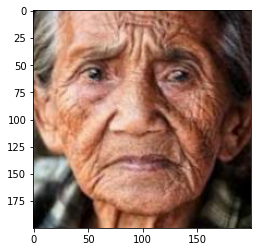

In [6]:
i=23704
print(at.Id[i])
image=io.imread(at.Id[i])
plt.imshow(image)

Idata=np.array(image)
print("\nLa imagen tiene forma: ",Idata.shape,"\n")
print(Idata)

In [7]:
for i in range(2000,2010): 
    x=at.Id[i]
    image=io.imread(x)
    print(image.shape)

(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)


In [0]:
dataset_array = []

for i in range(at.shape[0]):
  img = load_img(at.Id[i])
  img_array = img_to_array(img)
  dataset_array.append(img_array)

dataset_array2 = np.array(dataset_array)

In [6]:
dataset_array2[23704]

array([[[18., 13., 10.],
        [17., 12.,  8.],
        [38., 33., 29.],
        ...,
        [43., 32., 26.],
        [48., 38., 29.],
        [59., 46., 38.]],

       [[18., 13., 10.],
        [25., 20., 16.],
        [52., 47., 43.],
        ...,
        [56., 45., 39.],
        [56., 46., 37.],
        [60., 47., 39.]],

       [[21., 13., 10.],
        [36., 31., 27.],
        [70., 65., 61.],
        ...,
        [67., 56., 50.],
        [62., 51., 45.],
        [59., 46., 38.]],

       ...,

       [[ 1.,  3.,  2.],
        [ 0.,  2.,  1.],
        [ 0.,  1.,  2.],
        ...,
        [38., 40., 29.],
        [37., 39., 28.],
        [37., 38., 30.]],

       [[ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  2.],
        ...,
        [33., 35., 24.],
        [28., 29., 21.],
        [23., 24., 16.]],

       [[ 2.,  4.,  3.],
        [ 4.,  6.,  5.],
        [ 6., 10., 11.],
        ...,
        [22., 23., 15.],
        [13., 14.,  6.],
        [ 5.,  6.,  0.]]

In [7]:
type(dataset_array2)
dataset_array2.shape

(23705, 200, 200, 3)

In [8]:
dataset_array2.resize((23705,200*200*3)) 
dataset_array2[23704]

array([18., 13., 10., ...,  5.,  6.,  0.], dtype=float32)

In [9]:
dataset_array2[23704].reshape((200,200,3))

array([[[18., 13., 10.],
        [17., 12.,  8.],
        [38., 33., 29.],
        ...,
        [43., 32., 26.],
        [48., 38., 29.],
        [59., 46., 38.]],

       [[18., 13., 10.],
        [25., 20., 16.],
        [52., 47., 43.],
        ...,
        [56., 45., 39.],
        [56., 46., 37.],
        [60., 47., 39.]],

       [[21., 13., 10.],
        [36., 31., 27.],
        [70., 65., 61.],
        ...,
        [67., 56., 50.],
        [62., 51., 45.],
        [59., 46., 38.]],

       ...,

       [[ 1.,  3.,  2.],
        [ 0.,  2.,  1.],
        [ 0.,  1.,  2.],
        ...,
        [38., 40., 29.],
        [37., 39., 28.],
        [37., 38., 30.]],

       [[ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  2.],
        ...,
        [33., 35., 24.],
        [28., 29., 21.],
        [23., 24., 16.]],

       [[ 2.,  4.,  3.],
        [ 4.,  6.,  5.],
        [ 6., 10., 11.],
        ...,
        [22., 23., 15.],
        [13., 14.,  6.],
        [ 5.,  6.,  0.]]

In [0]:
import tensorflow as tf
dataset_array2=dataset_array2/255.

In [11]:
dataset_array2[23704].reshape((200,200,3))

array([[[0.07058824, 0.05098039, 0.03921569],
        [0.06666667, 0.04705882, 0.03137255],
        [0.14901961, 0.12941177, 0.11372549],
        ...,
        [0.16862746, 0.1254902 , 0.10196079],
        [0.1882353 , 0.14901961, 0.11372549],
        [0.23137255, 0.18039216, 0.14901961]],

       [[0.07058824, 0.05098039, 0.03921569],
        [0.09803922, 0.07843138, 0.0627451 ],
        [0.20392157, 0.18431373, 0.16862746],
        ...,
        [0.21960784, 0.1764706 , 0.15294118],
        [0.21960784, 0.18039216, 0.14509805],
        [0.23529412, 0.18431373, 0.15294118]],

       [[0.08235294, 0.05098039, 0.03921569],
        [0.14117648, 0.12156863, 0.10588235],
        [0.27450982, 0.25490198, 0.23921569],
        ...,
        [0.2627451 , 0.21960784, 0.19607843],
        [0.24313726, 0.2       , 0.1764706 ],
        [0.23137255, 0.18039216, 0.14901961]],

       ...,

       [[0.00392157, 0.01176471, 0.00784314],
        [0.        , 0.00784314, 0.00392157],
        [0.        , 0

In [12]:
tensor = tf.constant(dataset_array2, dtype= tf.float32)
tensor.shape

TensorShape([23705, 120000])

In [0]:
from numpy import asarray
from numpy import savez_compressed
savez_compressed('/content/drive/My Drive/Mineria/datos.npz',dataset_array2)